<a href="https://colab.research.google.com/github/Abir196/Wasteless/blob/main/Partie_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install pycaret

In [ ]:
import pandas as pd
import pycaret

In [ ]:
pip install m2cgen


In [ ]:
pip install numba --upgrade

In [ ]:
data = pd.read_csv("ma_data.csv")
data = data.drop("Unnamed: 0",axis=1)
data.dtypes

LCLid               int64
energy(kWh/hh)    float64
temperature       float64
year                int64
month               int64
day                 int64
hour                int64
dtype: object

In [ ]:
len(list(data["LCLid"].unique()))

49

In [ ]:
eta = 0.2
df_model = data.iloc[:int(data.shape[0]*(1-eta))]
df_real = data.iloc[int(data.shape[0]*(1-eta)):]
df_model.shape

(48916, 7)

In [ ]:
df_model1 = df_model.iloc[:int(df_model.shape[0]*0.75)]
df_test =  df_model.iloc[int(df_model.shape[0]*0.75):]

In [ ]:
from pycaret.regression import *
exp_name = setup(data = df_model1,  target = 'energy(kWh/hh)', feature_selection=False, numeric_features =["LCLid","year","month","day","hour","temperature"]) 

comp_model = compare_models() 

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.1784,0.0918,0.3029,0.7704,0.1505,0.6291,0.239
rf,Random Forest Regressor,0.1730,0.0929,0.3047,0.7677,0.1525,0.5870,5.563
et,Extra Trees Regressor,0.1748,0.0972,0.3118,0.7568,0.1568,0.5927,3.671
knn,K Neighbors Regressor,0.1840,0.1037,0.3219,0.7408,0.1594,0.5870,0.117
gbr,Gradient Boosting Regressor,0.2012,0.1087,0.3295,0.7284,0.1630,0.7313,1.265
dt,Decision Tree Regressor,0.2173,0.1657,0.4070,0.5852,0.2004,0.6915,0.095
ada,AdaBoost Regressor,0.3349,0.2052,0.4524,0.4865,0.2505,1.6081,0.368
lar,Least Angle Regression,0.4627,0.3777,0.6145,0.0554,0.3341,2.7961,0.017
br,Bayesian Ridge,0.4628,0.3777,0.6145,0.0554,0.3341,2.7974,0.020
ridge,Ridge Regression,0.4628,0.3777,0.6145,0.0554,0.3341,2.7966,0.016


INFO:logs:create_model_container: 18
INFO:logs:master_model_container: 18
INFO:logs:display_container: 2
INFO:logs:LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
              importance_type='split', learning_rate=0.1, max_depth=-1,
              min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
              n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
              random_state=2398, reg_alpha=0.0, reg_lambda=0.0, silent='warn',
              subsample=1.0, subsample_for_bin=200000, subsample_freq=0)
INFO:logs:compare_models() succesfully completed......................................


In [ ]:
from pycaret.regression import *
exp_name = setup(data = df_model,  target = 'energy(kWh/hh)', feature_selection=False, numeric_features =["LCLid","year","month","day","hour","temperature"]) 

lgbm = create_model('lightgbm')
tune_model(lgbm)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.1822,0.0973,0.3119,0.7543,0.1518,0.6813
1,0.1829,0.1001,0.3163,0.7740,0.1536,0.6324
2,0.1767,0.0913,0.3021,0.7786,0.1475,0.6245
3,0.1799,0.0951,0.3084,0.7781,0.1510,0.7047
4,0.1860,0.1057,0.3251,0.7671,0.1555,0.6679
5,0.1818,0.0924,0.3040,0.7786,0.1526,0.6590
6,0.1817,0.0971,0.3116,0.7794,0.1537,0.7027
7,0.1773,0.0887,0.2978,0.7798,0.1503,0.6677
8,0.1813,0.0948,0.3080,0.7774,0.1528,0.6701


INFO:logs:create_model_container: 2
INFO:logs:master_model_container: 2
INFO:logs:display_container: 3
INFO:logs:LGBMRegressor(bagging_fraction=0.5, bagging_freq=0, boosting_type='gbdt',
              class_weight=None, colsample_bytree=1.0, feature_fraction=1.0,
              importance_type='split', learning_rate=0.05, max_depth=-1,
              min_child_samples=11, min_child_weight=0.001, min_split_gain=0,
              n_estimators=170, n_jobs=-1, num_leaves=60, objective=None,
              random_state=5495, reg_alpha=0.5, reg_lambda=2, silent='warn',
              subsample=1.0, subsample_for_bin=200000, subsample_freq=0)
INFO:logs:tune_model() succesfully completed......................................


LGBMRegressor(bagging_fraction=0.5, bagging_freq=0, boosting_type='gbdt',
              class_weight=None, colsample_bytree=1.0, feature_fraction=1.0,
              importance_type='split', learning_rate=0.05, max_depth=-1,
              min_child_samples=11, min_child_weight=0.001, min_split_gain=0,
              n_estimators=170, n_jobs=-1, num_leaves=60, objective=None,
              random_state=5495, reg_alpha=0.5, reg_lambda=2, silent='warn',
              subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

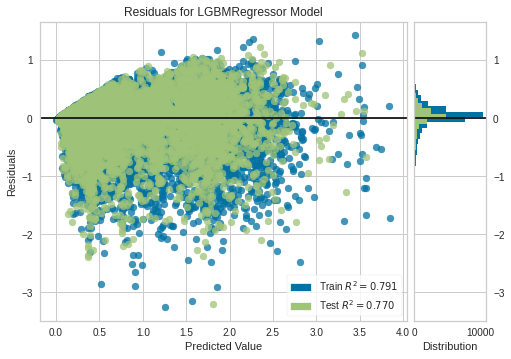

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [ ]:
plot_model(lgbm)

In [ ]:
lgbmJS = convert_model(lgbm, language = 'javascript')

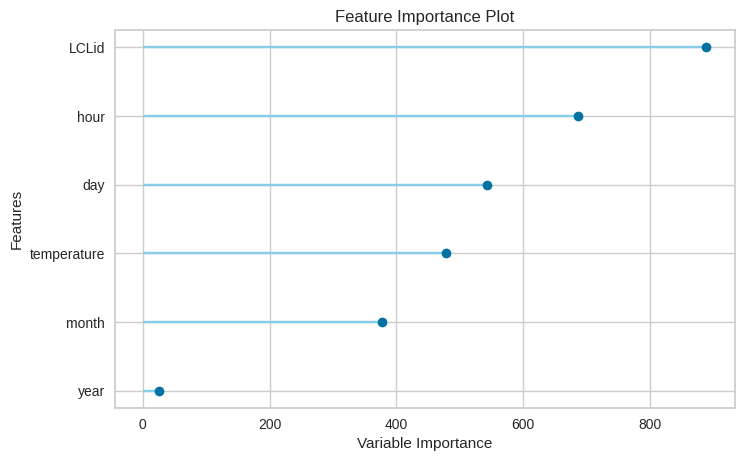

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [ ]:
plot_model(lgbm, plot='feature')

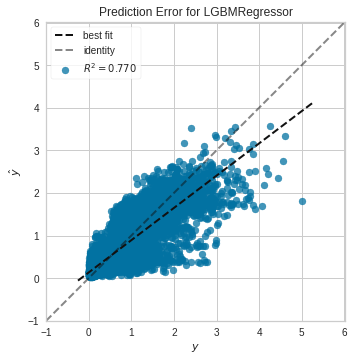

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [ ]:
plot_model(lgbm, plot = 'error')

In [ ]:
predict_model(lgbm)

INFO:logs:Initializing predict_model()
INFO:logs:predict_model(estimator=LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
              importance_type='split', learning_rate=0.1, max_depth=-1,
              min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
              n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
              random_state=5495, reg_alpha=0.0, reg_lambda=0.0, silent='warn',
              subsample=1.0, subsample_for_bin=200000, subsample_freq=0), probability_threshold=None, encoded_labels=True, drift_report=False, raw_score=False, round=4, verbose=True, ml_usecase=MLUsecase.REGRESSION, display=None, drift_kwargs=None)
INFO:logs:Checking exceptions
INFO:logs:Preloading libraries
INFO:logs:Preparing display monitor


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Light Gradient Boosting Machine,0.1824,0.0936,0.306,0.7702,0.1533,0.6878


,LCLid,temperature,year,month,day,hour,energy(kWh/hh),Label
0,3394.0,14.060000,2012.0,10.0,3.0,13.0,0.314,0.436451
1,450.0,7.530000,2012.0,5.0,16.0,7.0,1.126,1.477171
2,4431.0,16.870001,2012.0,6.0,24.0,11.0,0.472,0.385708
3,5492.0,19.879999,2012.0,9.0,4.0,21.0,0.098,0.174516
4,246.0,20.280001,2012.0,8.0,16.0,13.0,0.219,0.211259
...,...,...,...,...,...,...,...,...
14670,4387.0,14.640000,2012.0,9.0,29.0,16.0,0.059,0.102389
14671,3223.0,14.650000,2012.0,10.0,6.0,14.0,0.494,0.380700
14672,4247.0,14.670000,2012.0,7.0,19.0,2.0,0.258,0.238802
14673,4431.0,9.290000,2012.0,10.0,9.0,5.0,0.279,0.287468


In [ ]:
final_lightgbm = finalize_model(lgbm)

INFO:logs:Initializing finalize_model()
INFO:logs:finalize_model(estimator=LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
              importance_type='split', learning_rate=0.1, max_depth=-1,
              min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
              n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
              random_state=5495, reg_alpha=0.0, reg_lambda=0.0, silent='warn',
              subsample=1.0, subsample_for_bin=200000, subsample_freq=0), fit_kwargs=None, groups=None, model_only=True, display=None, experiment_custom_tags=None, return_train_score=False)
INFO:logs:Finalizing LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
              importance_type='split', learning_rate=0.1, max_depth=-1,
              min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
              n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
              random_state=54

In [ ]:
predict_model(final_lightgbm)

INFO:logs:Initializing predict_model()
INFO:logs:predict_model(estimator=LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
              importance_type='split', learning_rate=0.1, max_depth=-1,
              min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
              n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
              random_state=5495, reg_alpha=0.0, reg_lambda=0.0, silent='warn',
              subsample=1.0, subsample_for_bin=200000, subsample_freq=0), probability_threshold=None, encoded_labels=True, drift_report=False, raw_score=False, round=4, verbose=True, ml_usecase=MLUsecase.REGRESSION, display=None, drift_kwargs=None)
INFO:logs:Checking exceptions
INFO:logs:Preloading libraries
INFO:logs:Preparing display monitor


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Light Gradient Boosting Machine,0.1767,0.0869,0.2948,0.7867,0.1484,0.6658


In [ ]:
unseen_predictions = predict_model(final_lightgbm, data=df_real)
unseen_predictions.head()

INFO:logs:Initializing predict_model()
INFO:logs:predict_model(estimator=LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
              importance_type='split', learning_rate=0.1, max_depth=-1,
              min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
              n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
              random_state=5495, reg_alpha=0.0, reg_lambda=0.0, silent='warn',
              subsample=1.0, subsample_for_bin=200000, subsample_freq=0), probability_threshold=None, encoded_labels=True, drift_report=False, raw_score=False, round=4, verbose=True, ml_usecase=MLUsecase.REGRESSION, display=None, drift_kwargs=None)
INFO:logs:Checking exceptions
INFO:logs:Preloading libraries
INFO:logs:Preparing display monitor


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Light Gradient Boosting Machine,0,0,0,0,0,0


,LCLid,energy(kWh/hh),temperature,year,month,day,hour,Label
48916,2,0.211,7.87,2012,10,13,2,0.047297
48917,246,0.078,7.87,2012,10,13,2,0.209918
48918,1074,0.271,7.87,2012,10,13,2,0.196116
48919,3223,0.121,7.87,2012,10,13,2,0.174758
48920,3463,0.063,7.87,2012,10,13,2,0.161807


In [ ]:
unseen_predictions.rename(columns = {'energy(kWh/hh)':'energy'}, inplace = True)

In [ ]:
unseen_predictions.dropna()

,LCLid,energy,temperature,year,month,day,hour,Label
48916,2,0.211,7.87,2012,10,13,2,0.047297
48917,246,0.078,7.87,2012,10,13,2,0.209918
48918,1074,0.271,7.87,2012,10,13,2,0.196116
48919,3223,0.121,7.87,2012,10,13,2,0.174758
48920,3463,0.063,7.87,2012,10,13,2,0.161807
...,...,...,...,...,...,...,...,...
61139,3863,0.097,9.74,2012,10,26,0,0.228186
61140,3874,0.151,9.74,2012,10,26,0,0.228186
61141,3668,0.262,9.74,2012,10,26,0,0.212043
61142,4179,1.660,9.74,2012,10,26,0,2.455871


In [ ]:
data["LCLid"].values

array([ 246,  246,  246, ..., 4179, 4247, 4319])

In [ ]:
Client246_real = df_real[df_real['LCLid'] == 246]
Client4319_real = df_real.loc[df_real['LCLid'] == 4319]
Client4319_real

,LCLid,energy(kWh/hh),temperature,year,month,day,hour
48940,4319,0.788,7.89,2012,10,13,3
48973,4319,0.809,7.74,2012,10,13,4
49007,4319,0.899,7.33,2012,10,13,5
49035,4319,0.806,6.50,2012,10,13,6
49074,4319,2.140,6.47,2012,10,13,7
...,...,...,...,...,...,...,...
60950,4319,1.251,10.15,2012,10,25,20
60997,4319,1.996,10.16,2012,10,25,21
61046,4319,1.627,10.09,2012,10,25,22
61096,4319,1.131,10.11,2012,10,25,23


In [ ]:
Client246_model = df_model[df_model['LCLid'] == 246]
Client4319_model = df_model.loc[df_model['LCLid'] == 4319]
Client4319_model.shape

(3378, 7)

In [ ]:
Client246_real['LCLid'] = Client246_real['LCLid'].replace(246,1)
Client4319_real['LCLid'] = Client4319_real['LCLid'].replace(4319,2)
Client246_model['LCLid'] = Client246_model['LCLid'].replace(246,1)
Client4319_model['LCLid'] = Client4319_model['LCLid'].replace(4319,2)

In [ ]:
Client246_model.to_csv("Client246_model.csv")